In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/Colab Notebooks/DeepFake

/gdrive/MyDrive/Colab Notebooks/DeepFake


In [ ]:
!ls

deepfake-detection-challenge.zip


In [ ]:
!unzip '/gdrive/MyDrive/Colab Notebooks/DeepFake/deepfake-detection-challenge.zip'

Archive:  /gdrive/MyDrive/Colab Notebooks/DeepFake/deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp

In [ ]:
!ls

deepfake-detection-challenge.zip  test_videos
sample_submission.csv		  train_sample_videos


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 36kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=02fa821573de616c97d6915ddde848bfccd42811a9e50bc6ab9d19257dce860b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# *Data Analysis*

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd

In [ ]:
main_dir = '/gdrive/MyDrive/Colab Notebooks/DeepFake'

In [ ]:
metadata = pd.read_json(os.path.join(main_dir,'train_sample_videos/metadata.json')).T #for numpy transpose
print(pd.Series(metadata['original']).value_counts())

atvmxvwyns.mp4    6
meawmsgiti.mp4    6
qeumxirsme.mp4    5
kgbkktcjxf.mp4    5
gbqrgajyca.mp4    4
                 ..
ccfoszqabv.mp4    1
nzquxipbye.mp4    1
jkddywriuf.mp4    1
rvoudrbyac.mp4    1
tqhbgzfwsf.mp4    1
Name: original, Length: 209, dtype: int64


In [ ]:
print(metadata.label.head(10))

aagfhgtpmv.mp4    FAKE
aapnvogymq.mp4    FAKE
abarnvbtwb.mp4    REAL
abofeumbvv.mp4    FAKE
abqwwspghj.mp4    FAKE
acifjvzvpm.mp4    FAKE
acqfdwsrhi.mp4    FAKE
acxnxvbsxk.mp4    FAKE
acxwigylke.mp4    FAKE
aczrgyricp.mp4    FAKE
Name: label, dtype: object


In [ ]:
train_list = os.listdir(os.path.join(main_dir,'train_sample_videos/'))
meta = np.array(list(metadata.index))
storage = np.array([file for file in train_list if  file.endswith('mp4')])
print(f"Metadata: {meta.shape[0]}, Folder: {storage.shape[0]}")
#print(f"Files in metadata and not in folder: {np.setdiff1d(meta,storage,assume_unique=False).shape[0]}")
#print(f"Files in folder and not in metadata: {np.setdiff1d(storage,meta,assume_unique=False).shape[0]}")

Metadata: 400, Folder: 400


['FAKE' 'REAL']
Real: 77
Fake: 323


Text(0, 0.5, 'The Number of videos')

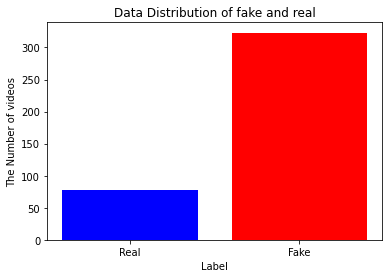

In [ ]:
#Finding out how many are fake and real - plotting
import matplotlib.pyplot as plt
print(metadata.label.unique())
print(f"Real: {(metadata.label=='REAL').sum()}")
print(f"Fake: {(metadata.label=='FAKE').sum()}")
plt.bar(['Real','Fake'],[(metadata.label=='REAL').sum(),(metadata.label=='FAKE').sum()],color=['blue','red'])
plt.title('Data Distribution of fake and real')
plt.xlabel('Label')
plt.ylabel("The Number of videos")

In [ ]:
#Creating new directories or moving the files from the training folder to real and fake folder


def dir_creator(path_val,dir_name):
  if(os.path.isdir(os.path.join(path_val,dir_name))):
    print(f"Folder named: {dir_name}, already exists!\n")
  else:
    print(f"Folder named: {dir_name}, has been created!\n")
    os.mkdir(os.path.join(path_val,dir_name))

In [ ]:
#The directory setup will be as follows:
""" Deepfake\Real\videos : data
    Deepfake\Fake\videos : data """
source = os.path.join(main_dir,'train_sample_videos/')
dir_creator(main_dir,'Real')
dir_creator(os.path.join(main_dir,'Real'),'videos')
dir_creator(main_dir,'Fake')
dir_creator(os.path.join(main_dir,'Fake'),'videos')

Folder named: Real, already exists!

Folder named: videos, already exists!

Folder named: Fake, already exists!

Folder named: videos, already exists!



In [ ]:
from os.path import join

In [ ]:
#Next we segregate the real and fake labelled videos into different folders frim the train_samples videos folder
#shutil.copytree() method recursively copies an entire directory tree rooted at source (src) to the destination directory. The destination directory, named by (dst) must not already exist.
for fn in metadata.index:
  if(metadata.loc[fn]['label']=='REAL'):
    src = join(source,fn)
    dest = os.path.join('/gdrive/MyDrive/Colab Notebooks/DeepFake/Real',fn)
    os.path.exists(src)
    os.path.exists(dest)
    shutil.move(src,dest,copy_function = shutil.copytree)
  elif(metadata.loc[fn]['label']=='FAKE'):
    src = join(source,fn)
    dest = os.path.join('/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake',fn)
    shutil.move(src,dest,copy_function = shutil.copytree)
  else:
    print("File not found!")
    continue

In [ ]:
print(f'Files in train directory : {len(os.listdir(source))}')

Files in train directory : 1


*Frame Extraction from the videos*

In [ ]:
def frame_extractor(base_dir,dest_dir):
  import cv2 
  import os 
  
  frame_list = [f for f in os.listdir(base_dir) if f.endswith('.mp4')]

  for fn in frame_list:
    cam = cv2.VideoCapture(os.path.join(base_dir,fn)) 
    cam.set(cv2.CAP_PROP_FPS, 24)
    while(True): 
      ret,frame = cam.read() 

      if ret: 
        name = dest_dir+'frame' + str(cam.get(cv2.CAP_PROP_POS_FRAMES)) + '.jpg'
        #Cap_prop_fps returns the number of frames per second and extracting it to respective jpg file
        print ('Creating!' + name) 
        cv2.imwrite(name, frame) 
      else: 
        break

   
    cam.release() 
    #this closes the IO device and frees the pointer, basically freeing memory
    cv2.destroyAllWindows()

In [ ]:
dir_creator(os.path.join(main_dir,'Fake/'),'FakeFrames')  
dir_creator(os.path.join(main_dir,'Real/'),'RealFrames')

Folder named: FakeFrames, has been created!

Folder named: RealFrames, has been created!



In [ ]:
#/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/videos
FakeBase = os.path.join(main_dir,'Fake/videos/')                   #the base directory where the Fake videos are stored
FakeDest = os.path.join(main_dir,'Fake/FakeFrames/')               #the directory where we want to store the Fake extracted frames
RealBase = os.path.join(main_dir,'Real/videos/')                   
RealDest = os.path.join(main_dir,'Real/RealFrames/')               

*Frame Extraction and storing to respective Fake Frames and Real Frames*

In [ ]:
frame_extractor(RealBase,RealDest)    #Extracting REAL Frames
print("\n Frames extracted successfully!\n")

Streaming output truncated to the last 5000 lines.
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame104.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame105.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame106.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame107.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame108.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame109.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame110.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame111.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame112.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame113.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/RealFrames/frame114.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Real/Rea

In [ ]:
frame_extractor(FakeBase,FakeDest)    #Extracting FAKE Frames
print("\n Frames extracted successfully!\n")

Streaming output truncated to the last 5000 lines.
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame102.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame103.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame104.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame105.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame106.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame107.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame108.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame109.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame110.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame111.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/FakeFrames/frame112.0.jpg
Creating!/gdrive/MyDrive/Colab Notebooks/DeepFake/Fake/Fak